# Data Analysis using the final merged file

## Table of contents

### [1. Importing libraries and datasets](#1)
### [2. Initial Inspection](#2)
### [3. Data Cleaning/wrangling](#3)
### [4. Univariate Analysis](#4)
### [5. Bivariate Analysis](#5)
### [6. Deriving variables (customer profiles)](#6)
### [7. Data visualizations](#7)
### [8. Exporting Dataframes](#8)

## 1. Importing libraries and datasets
<div id='1'></div>

In [4]:
# Importing the libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# creating a path to the local folder containing the final merged data set

path = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\02 Data\Prepared Data'

# importing latest merged and completed df

df = pd.read_pickle(os.path.join(path, 'ords_prods_high_activity_customers.pkl'))

## 2. Initial Inspection
<div id='2'></div>

In [18]:
# Checking the shape
df.shape

(30964564, 35)

In [20]:
# Checking the top 15 rows
df.head(15)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,years_since_join,_merge,Region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
5,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,Alabama,31,2019-02-17,3,married,40423,5,both,Region 3 (South),kept_high_activity


In [21]:
# Checking the last 15 rows
df.tail(15)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,years_since_join,_merge,Region,activity_flag
32404844,626363,206209,12,1,12,18.0,20590,15,0,Disinfecting Wipes Fresh Scent,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404845,626363,206209,12,1,12,18.0,16168,16,0,Large Organic Omega3 Brown Eggs,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404846,626363,206209,12,1,12,18.0,33351,17,0,Light Multi-Grain English Muffins,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404847,626363,206209,12,1,12,18.0,5622,18,0,Cocktail Tomatoes on the Vine,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404848,626363,206209,12,1,12,18.0,23039,19,1,Fat Free Cream Cheese,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404849,626363,206209,12,1,12,18.0,14727,20,0,Yellow Onion,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404850,2977660,206209,13,1,12,7.0,24852,1,1,Banana,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404851,2977660,206209,13,1,12,7.0,9405,2,1,Calcium Enriched 100% Lactose Free Fat Free Milk,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404852,2977660,206209,13,1,12,7.0,16168,3,1,Large Organic Omega3 Brown Eggs,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity
32404853,2977660,206209,13,1,12,7.0,39216,4,0,Original Multigrain Spoonfuls Cereal,...,Iowa,74,2019-09-14,3,married,137969,5,both,Region 2 (Midwest),kept_high_activity


In [22]:
# Checking the info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int64         
 1   user_id                 object        
 2   order_number            int64         
 3   order_day_of_week       int64         
 4   order_hour_of_day       int64         
 5   days_since_prior_order  float64       
 6   product_id              int64         
 7   add_to_cart_order       int64         
 8   reordered               int64         
 9   product_name            object        
 10  aisle_id                int64         
 11  department_id           int64         
 12  prices                  float64       
 13  _merge_prods            category      
 14  price_range_loc         object        
 15  Busiest day             object        
 16  Busiest_days_new        object        
 17  busiest_period_of_day   object        
 18  max_o

## 3.  Data Cleaning/wrangling
<div id='3'></div>

In [25]:
# Checking for duplicates
df.nunique()

order_id                  3064375
user_id                    162631
order_number                   99
order_day_of_week               7
order_hour_of_day              24
days_since_prior_order         31
product_id                  49628
add_to_cart_order             145
reordered                       2
product_name                49630
aisle_id                      134
department_id                  21
prices                        240
_merge_prods                    1
price_range_loc                 3
Busiest day                     3
Busiest_days_new                3
busiest_period_of_day           3
max_order                      95
loyalty_flag                    3
avg_price_by_user          120378
spending_flag                   2
median_frequency               61
frequency_flag                  3
gender                          2
state                          51
age                            64
date_joined                  1187
n_dependants                    4
fam_status    

In [29]:
# creating a new df from all duplicates

df_dup = df[df.duplicated()]

df_dup

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,years_since_join,_merge,Region,activity_flag


### No duplicates are present in the dataframe

In [26]:
# Checking for missing values
df.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
order_day_of_week               0
order_hour_of_day               0
days_since_prior_order    1661283
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                       4877
_merge_prods                    0
price_range_loc                 0
Busiest day                     0
Busiest_days_new                0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
avg_price_by_user               0
spending_flag                   0
median_frequency                0
frequency_flag                  0
gender                          0
state                           0
age                             0
date_joined                     0
n_dependants                    0
fam_status    

### The missing values in 'days_since_prior_order' are for the first order of each customer, having no prior order to their first
### Missing prices will be deleted since there are ffew missing values on this important value

In [30]:
# Checking for missing values as percentage
(df.isnull().sum()/(len(df)))*100

order_id                  0.00000
user_id                   0.00000
order_number              0.00000
order_day_of_week         0.00000
order_hour_of_day         0.00000
days_since_prior_order    5.36511
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
prices                    0.01575
_merge_prods              0.00000
price_range_loc           0.00000
Busiest day               0.00000
Busiest_days_new          0.00000
busiest_period_of_day     0.00000
max_order                 0.00000
loyalty_flag              0.00000
avg_price_by_user         0.00000
spending_flag             0.00000
median_frequency          0.00000
frequency_flag            0.00000
gender                    0.00000
state                     0.00000
age                       0.00000
date_joined               0.00000
n_dependants              0.00000
fam_status    

In [43]:
# Deleting null values from the 'prices' varible

df = df[~df['prices'].isnull()]

In [52]:
# Droping unecessary columns such as :'_merge_prods', 'Busiest day', '_merge'

df = df.drop(columns =['_merge_prods', 'Busiest day', '_merge'])

In [54]:
# checking for mixed-type with a for-loop method
for col in df.columns.tolist():
  weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

## 4. Univariate Analysis
<div id='4'></div>

In [56]:
# Calling a describe function for basic statistics
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
order_id,30959687.0,NaN,NaN,NaN,1710318.568353,2.0,855413.0,1710405.0,2565206.5,3421083.0,987378.773013
user_id,30959687,162631,201268,3704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_number,30959687.0,NaN,NaN,NaN,17.834435,1.0,5.0,12.0,25.0,99.0,17.634531
order_day_of_week,30959687.0,NaN,NaN,NaN,2.741393,0.0,1.0,3.0,5.0,6.0,2.089267
order_hour_of_day,30959687.0,NaN,NaN,NaN,13.410975,0.0,10.0,13.0,16.0,23.0,4.248863
days_since_prior_order,29298683.0,NaN,NaN,NaN,10.81017,0.0,5.0,7.0,14.0,30.0,8.57853
product_id,30959687.0,NaN,NaN,NaN,25598.876779,1.0,13544.0,25300.0,37947.0,49688.0,14081.942523
add_to_cart_order,30959687.0,NaN,NaN,NaN,8.363092,1.0,3.0,6.0,11.0,145.0,7.135442
reordered,30959687.0,NaN,NaN,NaN,0.606098,0.0,0.0,1.0,1.0,1.0,0.488614
product_name,30959687,49628,Banana,453164,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the statistics summary, we can infer the below findings :
- The 162,631 customers are between 18 and 81 y/o, with an average of one order every 10 days, order mostly by midday (1 p.m.) and spend 11,8$ by product in average
- The max number of orders for a customer being 99 could be an outlier since the average number of orders is about 17
- Frmom the flags, clients buy mostly mid range products and are mostly low spenders

In [57]:
# separating Numerical and categorical variables for easy analysis

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['user_id', 'product_name', 'price_range_loc', 'Busiest_days_new',
       'busiest_period_of_day', 'loyalty_flag', 'spending_flag',
       'frequency_flag', 'gender', 'state', 'fam_status', 'Region',
       'activity_flag'],
      dtype='object')
Numerical Variables:
['order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id', 'department_id', 'prices', 'max_order', 'avg_price_by_user', 'median_frequency', 'age', 'n_dependants', 'income', 'years_since_join']


order_id
Skew : -0.0


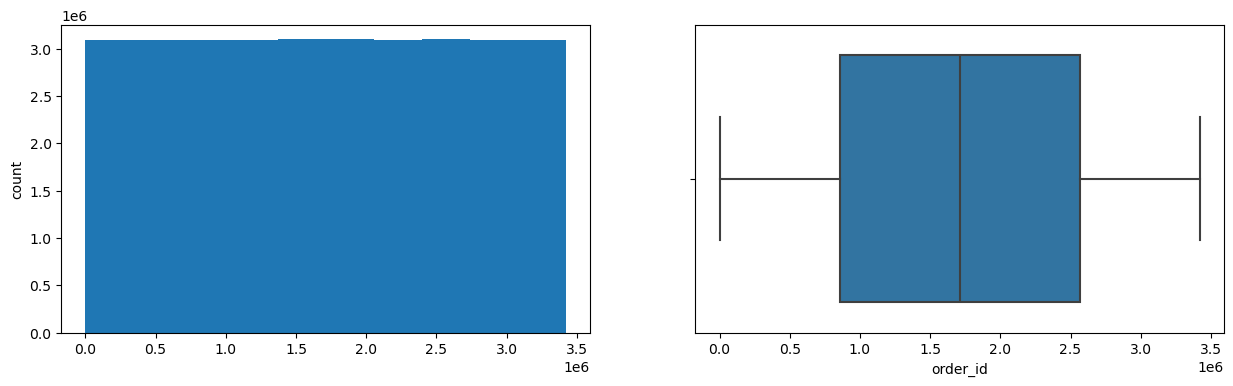

order_number
Skew : 1.72


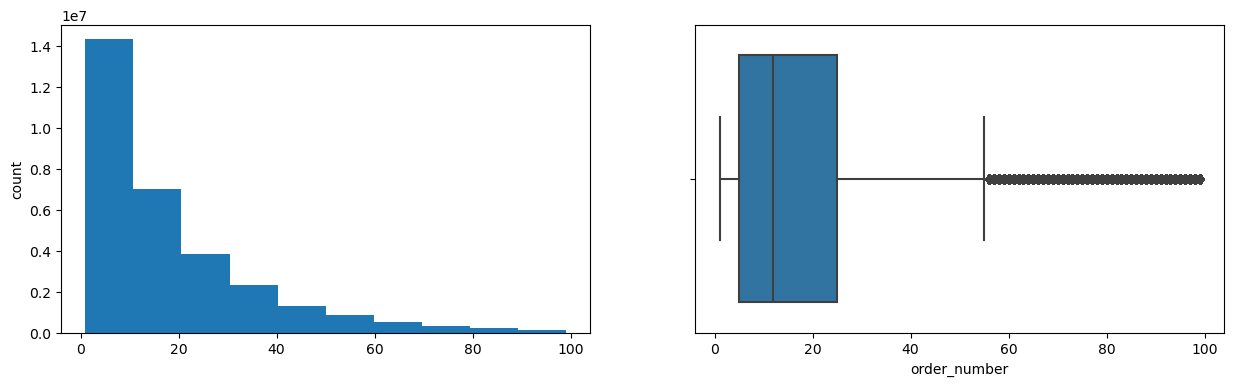

order_day_of_week
Skew : 0.18


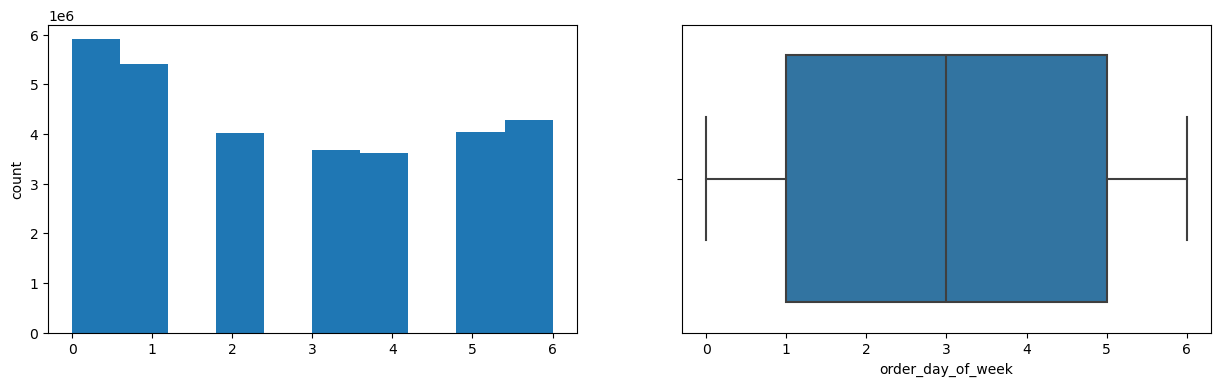

order_hour_of_day
Skew : -0.04


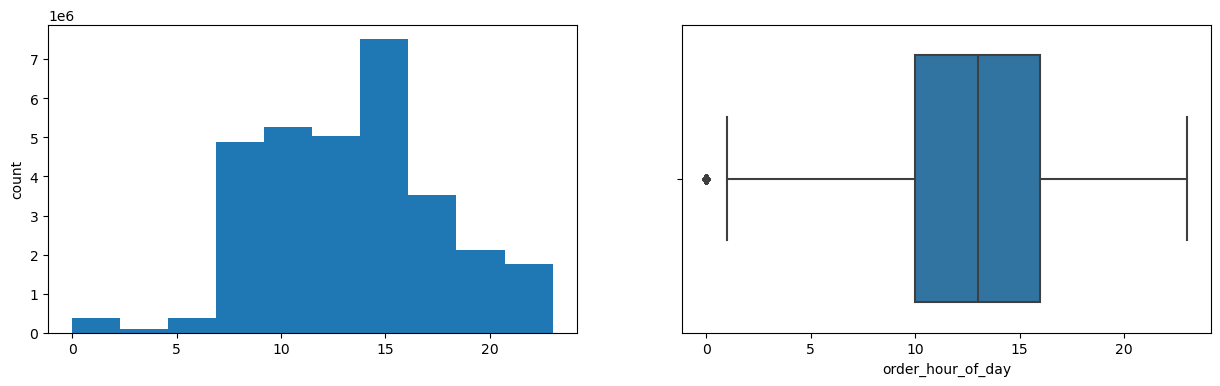

days_since_prior_order
Skew : 1.11


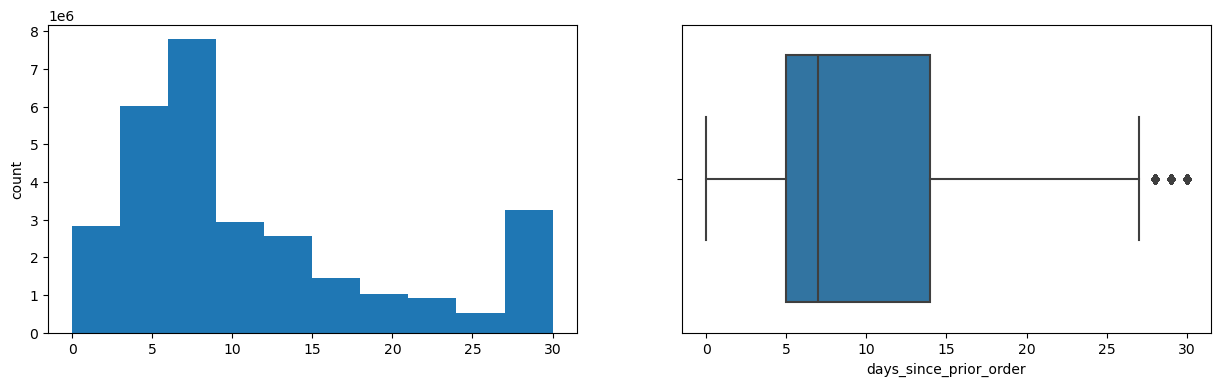

product_id
Skew : -0.02


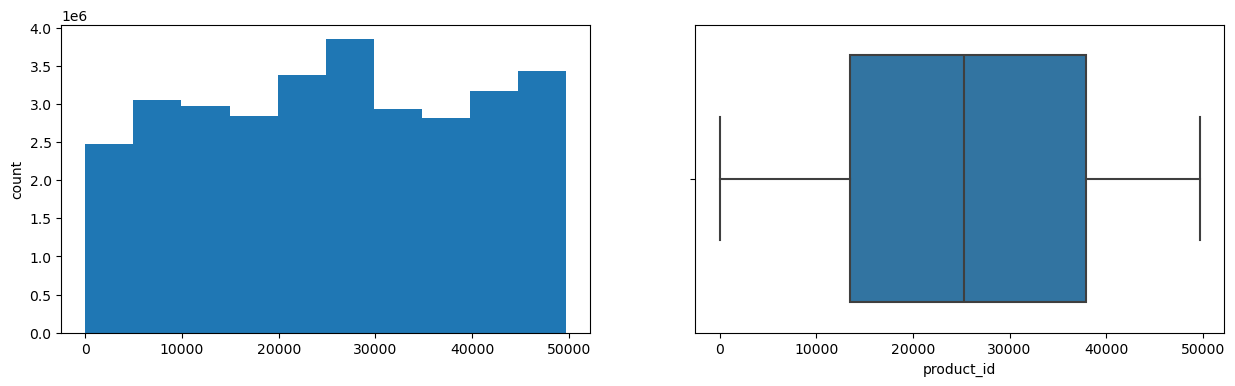

add_to_cart_order
Skew : 1.82


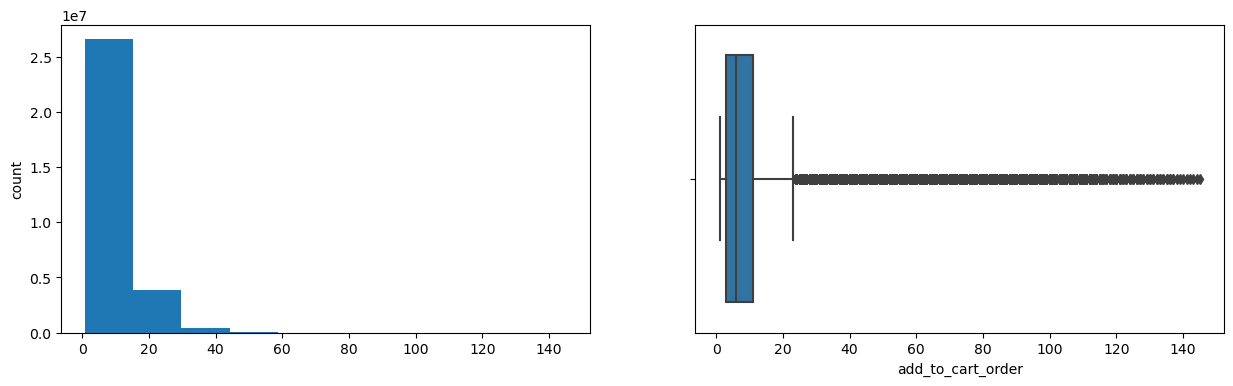

reordered
Skew : -0.43


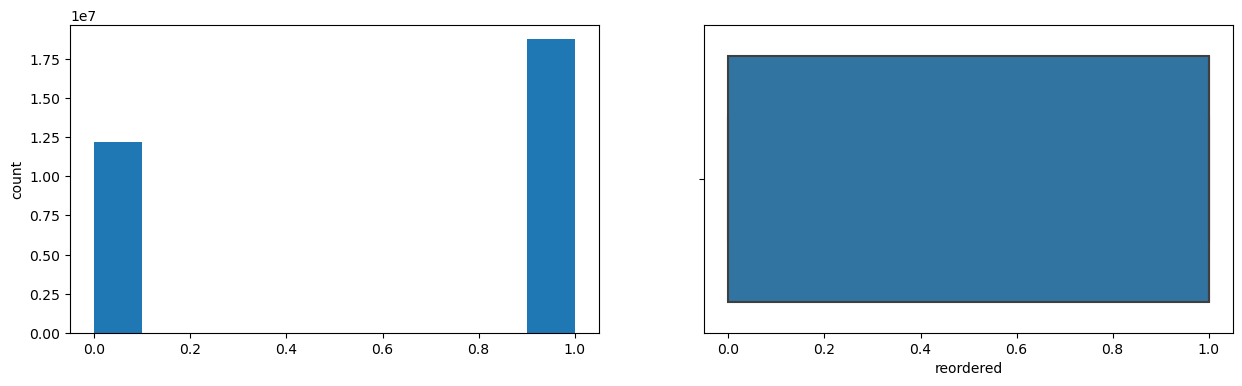

aisle_id
Skew : -0.17


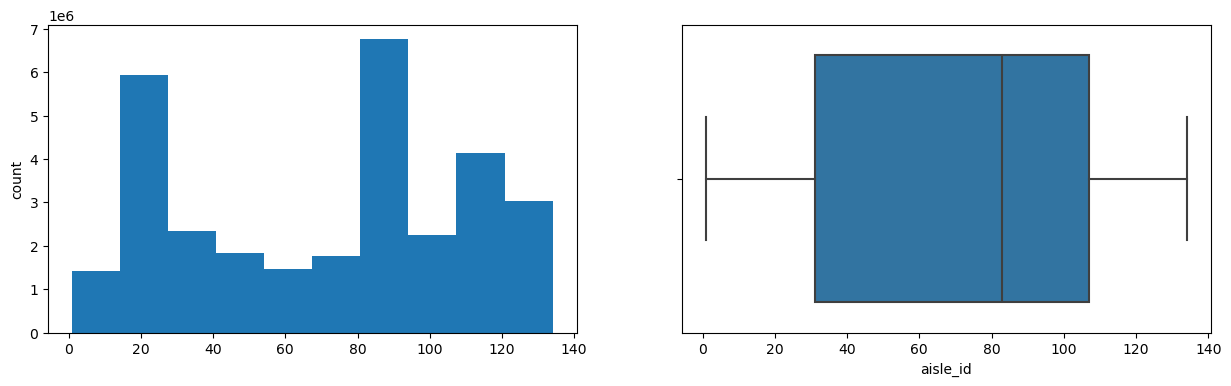

department_id
Skew : 0.15


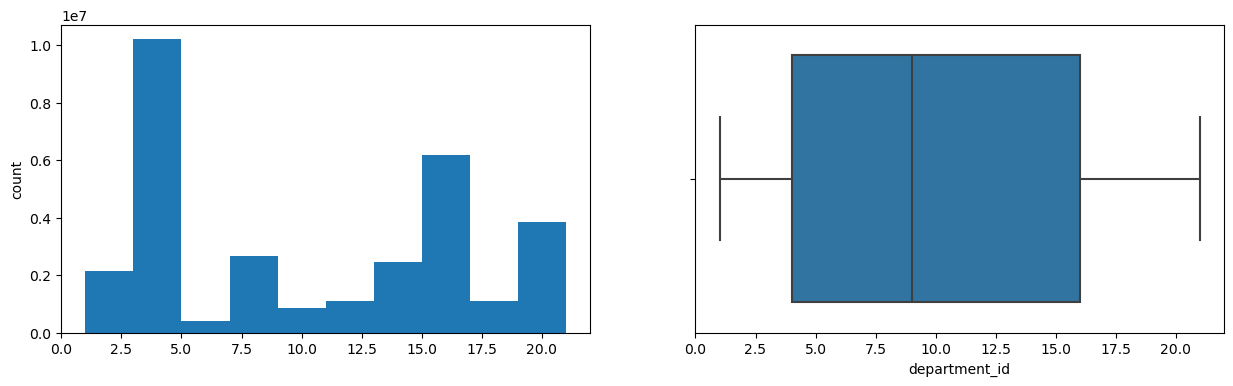

prices
Skew : 0.4


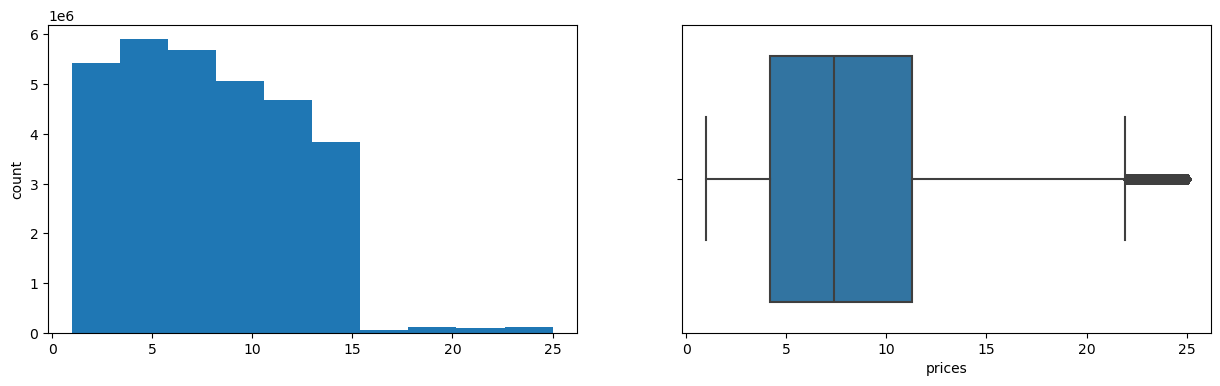

max_order
Skew : 1.01


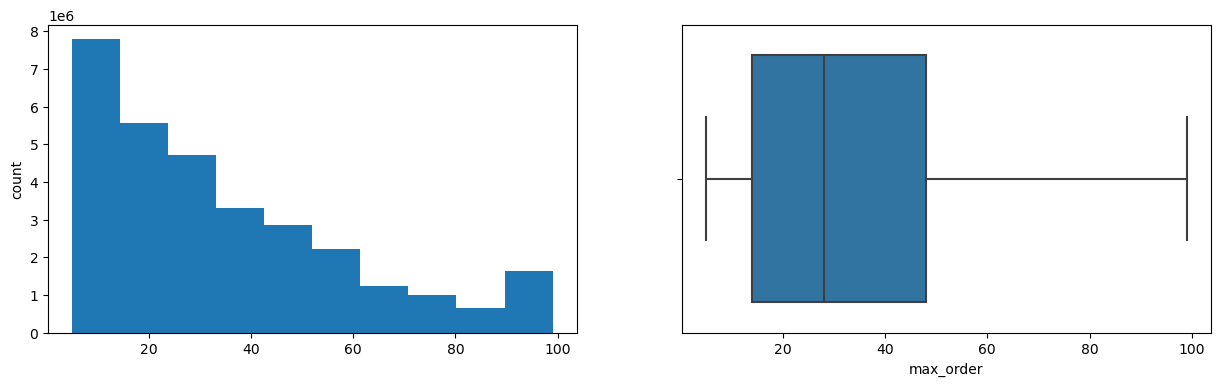

avg_price_by_user
Skew : 58.37


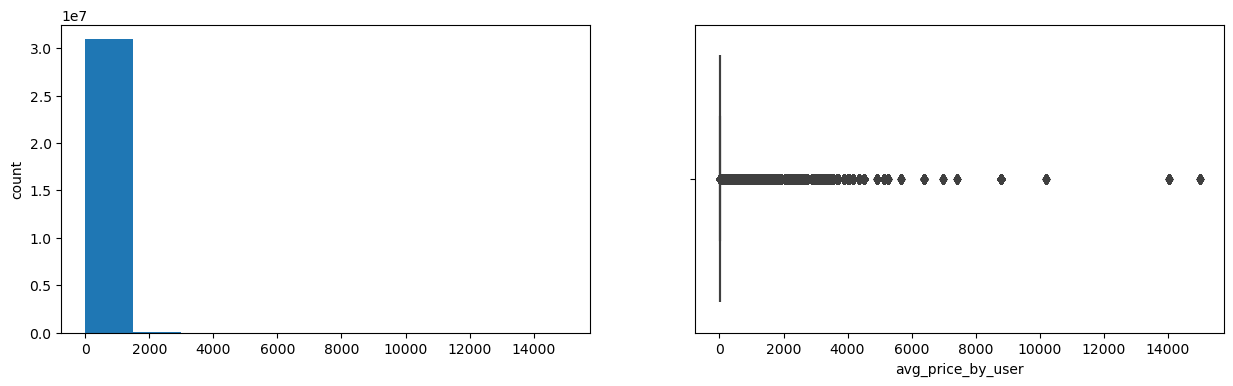

median_frequency
Skew : 1.53


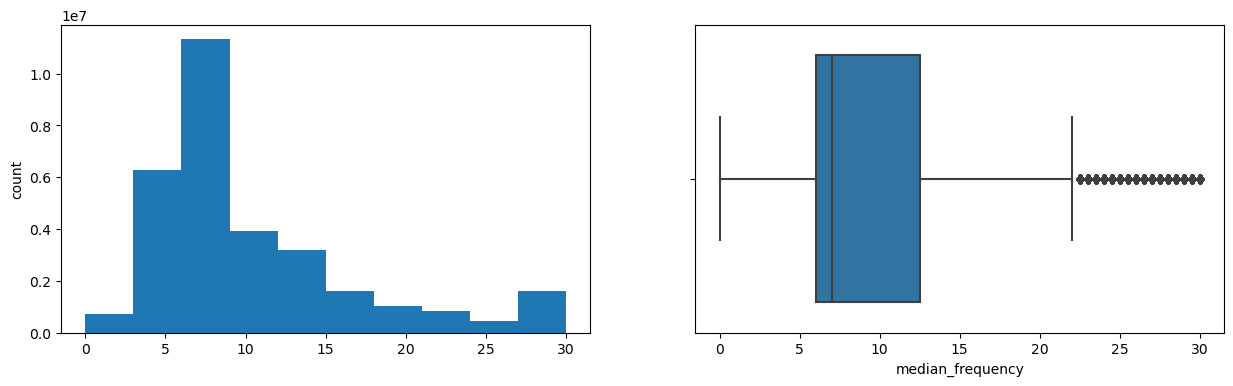

age
Skew : 0.01


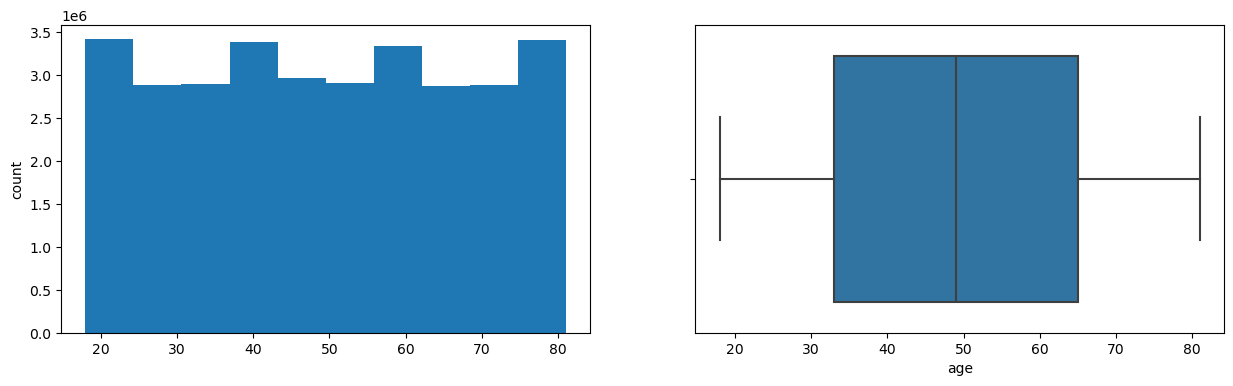

n_dependants
Skew : -0.0


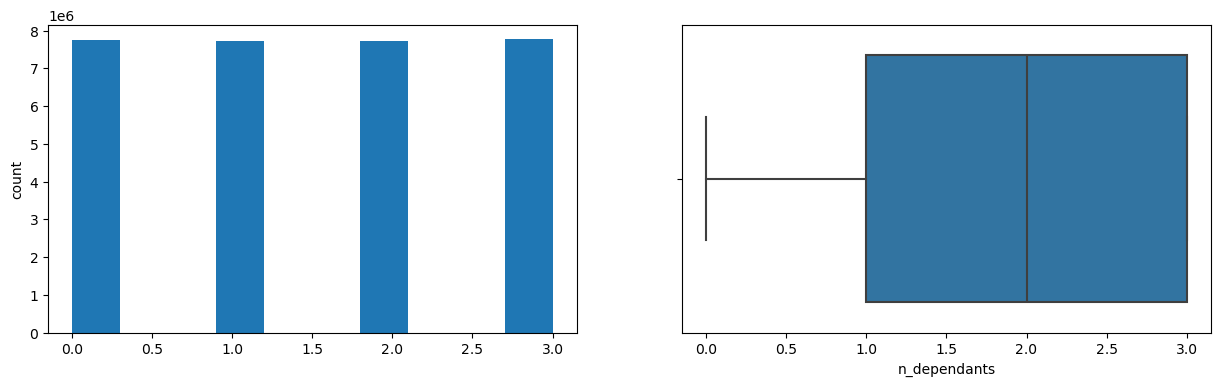

income
Skew : 1.72


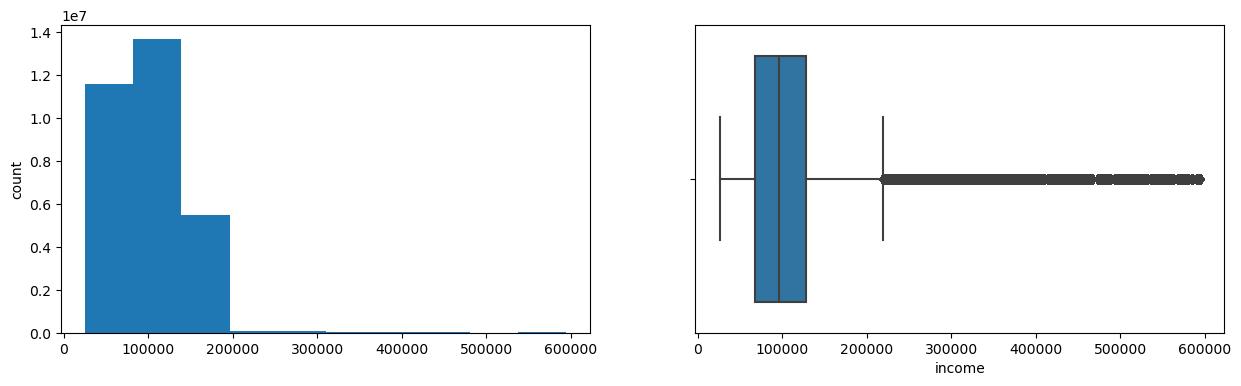

years_since_join
Skew : -0.23


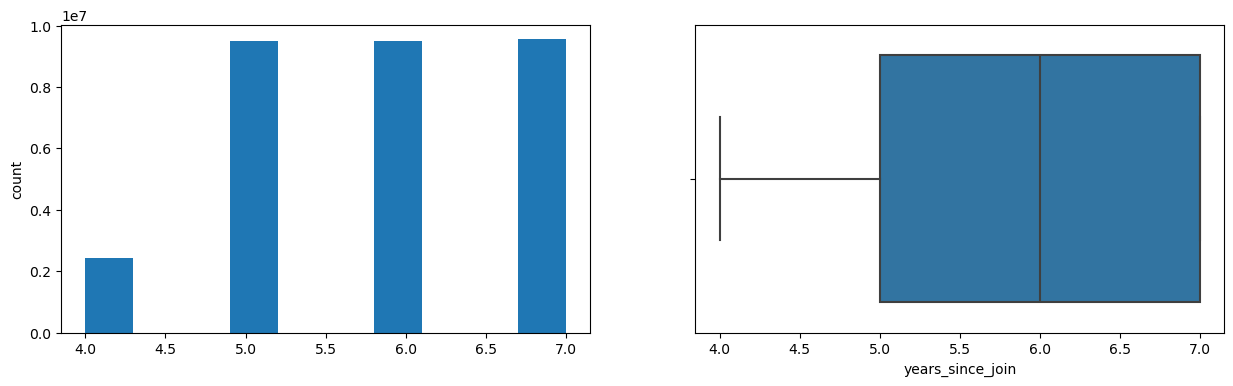

In [65]:
# Creating visuals for the numerical variables : histograms and boxplots

for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

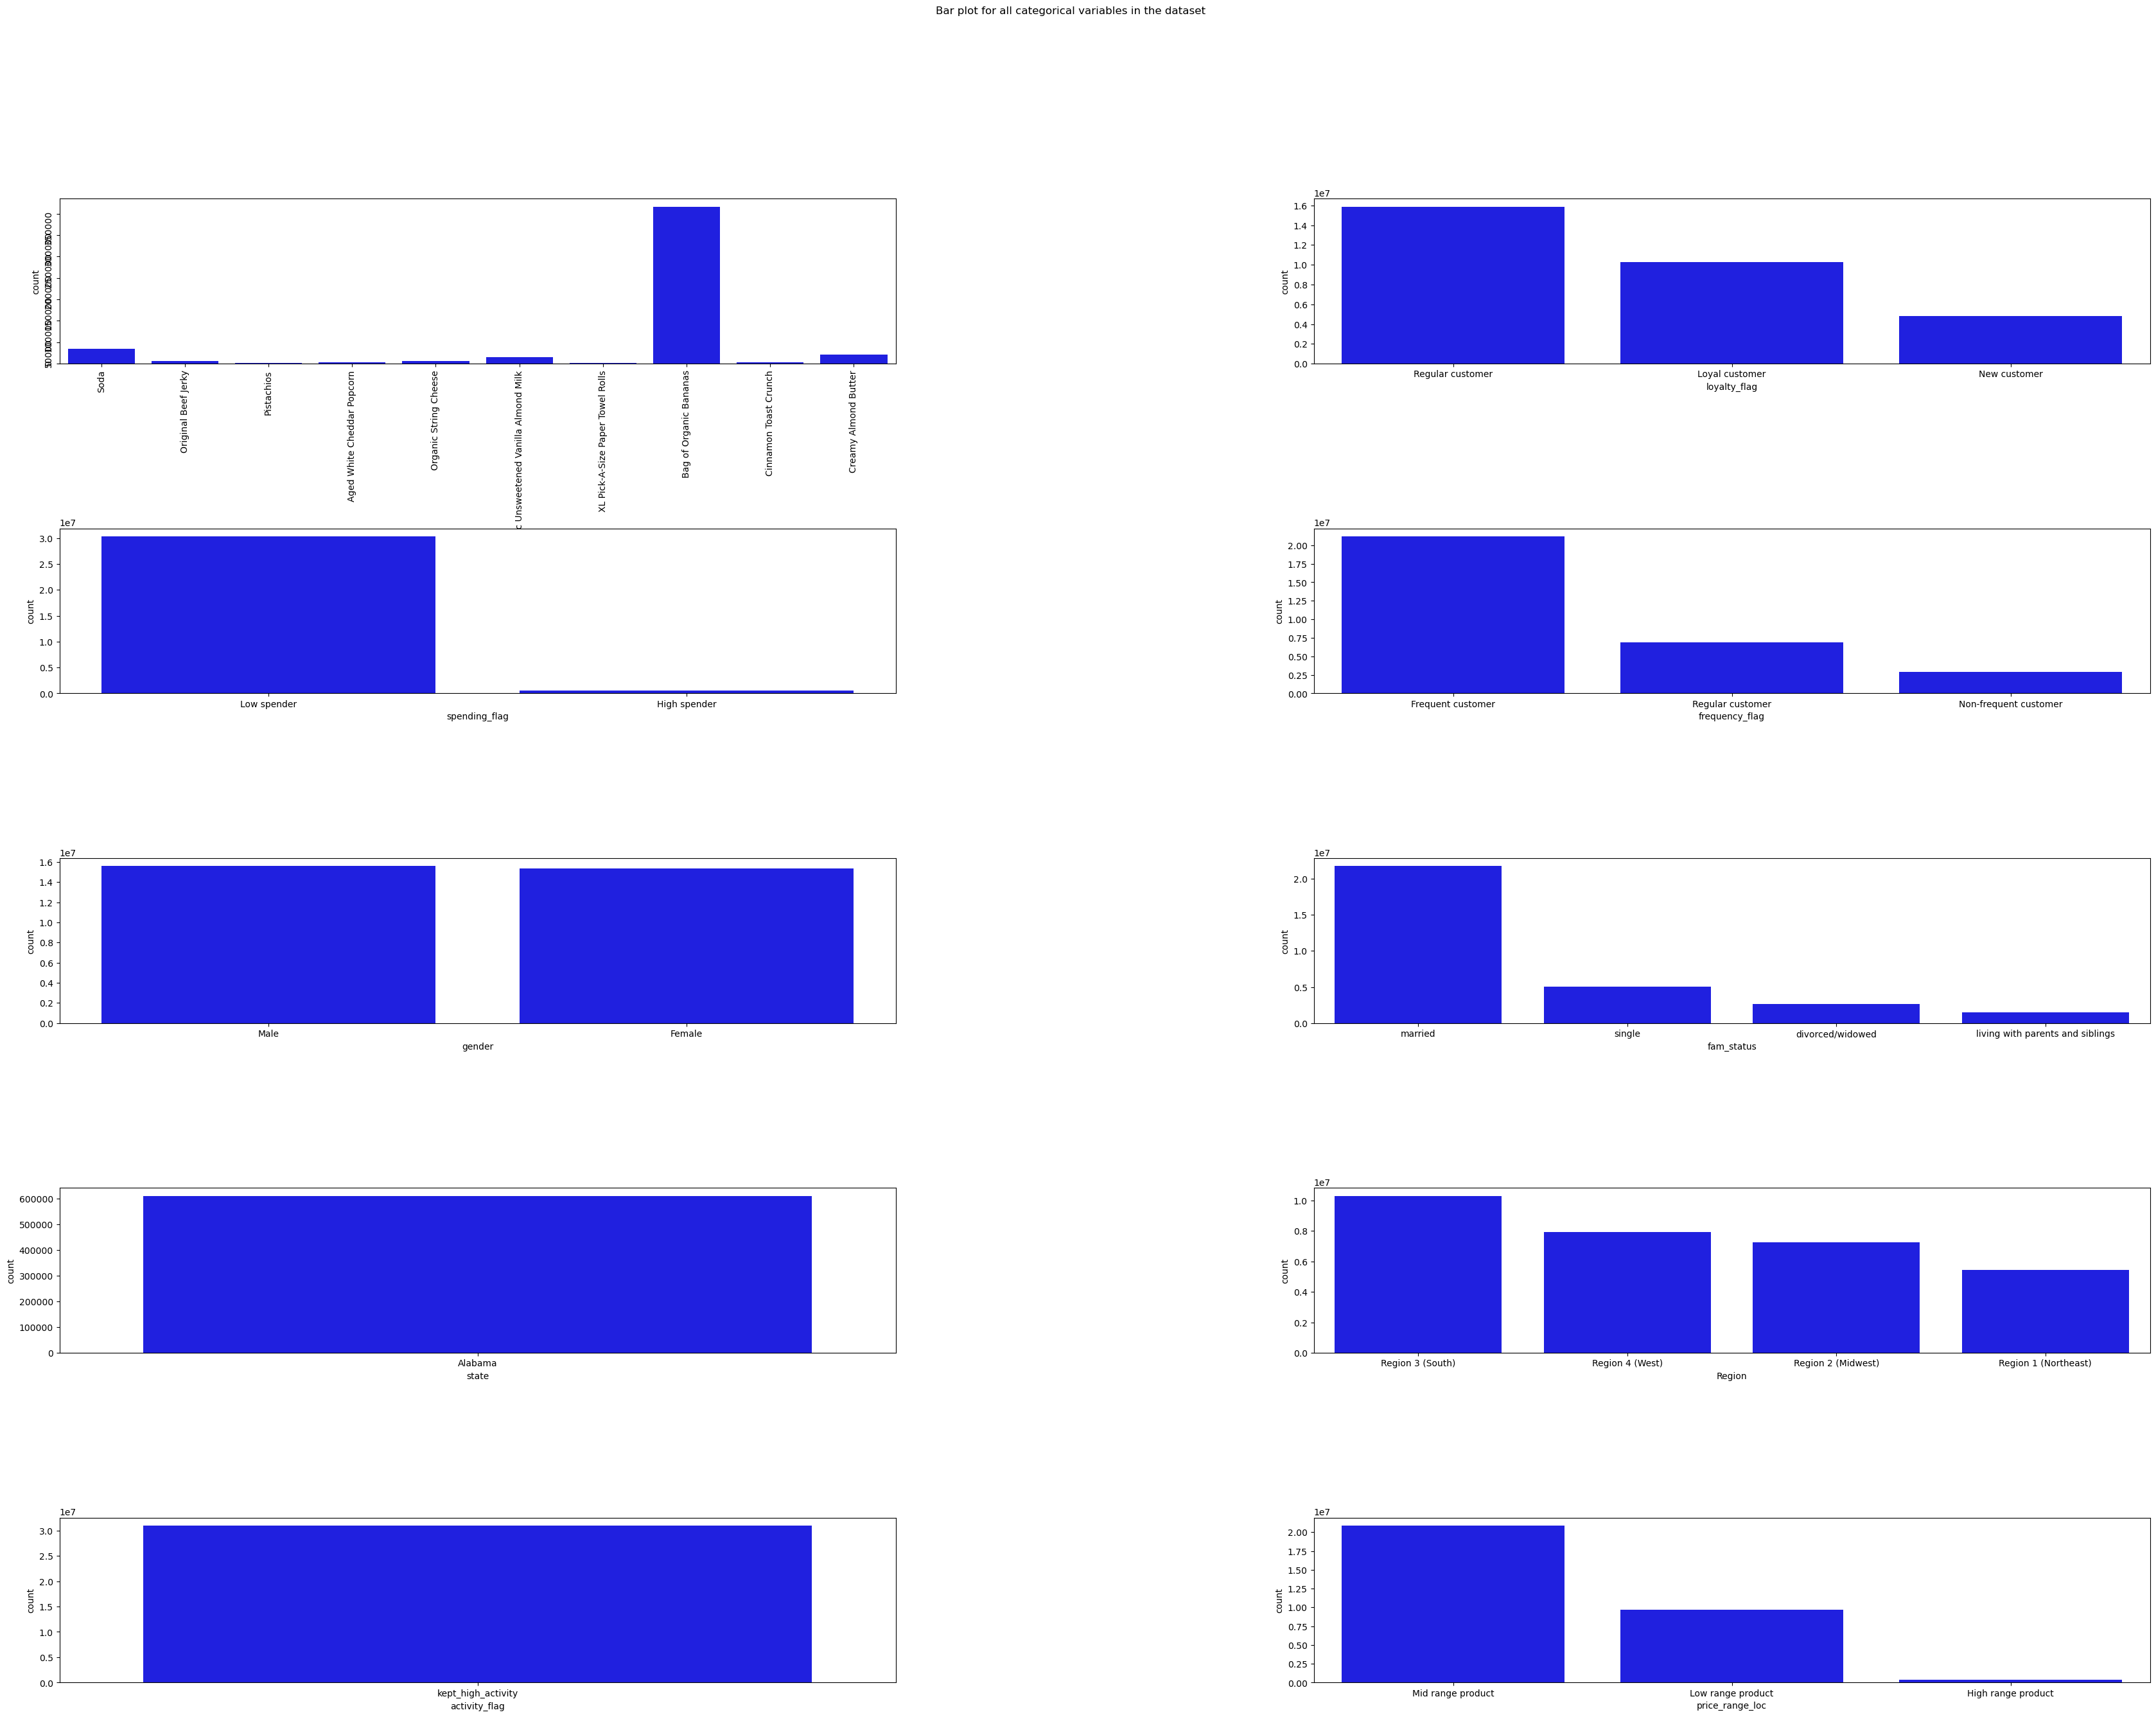

In [75]:
# Creating count plots for the categorical variables

fig, axes = plt.subplots(5, 2, figsize = (42, 30))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'product_name', data = df, color = 'blue', 
              order = df['product_name'].head(20).value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'loyalty_flag', data = df, color = 'blue', 
              order = df['loyalty_flag'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'spending_flag', data = df, color = 'blue', 
              order = df['spending_flag'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'frequency_flag', data = df, color = 'blue', 
              order = df['frequency_flag'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'gender', data = df, color = 'blue', 
              order = df['gender'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'fam_status', data = df, color = 'blue', 
              order = df['fam_status'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'state', data = df, color = 'blue', 
              order = df['state'].head(20).value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'Region', data = df, color = 'blue', 
              order = df['Region'].value_counts().index);
sns.countplot(ax = axes[4, 0], x = 'activity_flag', data = df, color = 'blue', 
              order = df['activity_flag'].value_counts().index);
sns.countplot(ax = axes[4, 1], x = 'price_range_loc', data = df, color = 'blue', 
              order = df['price_range_loc'].value_counts().index);
axes[0][0].tick_params(labelrotation=90);
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)


## 5. Bivariate Analysis
<div id='5'></div>

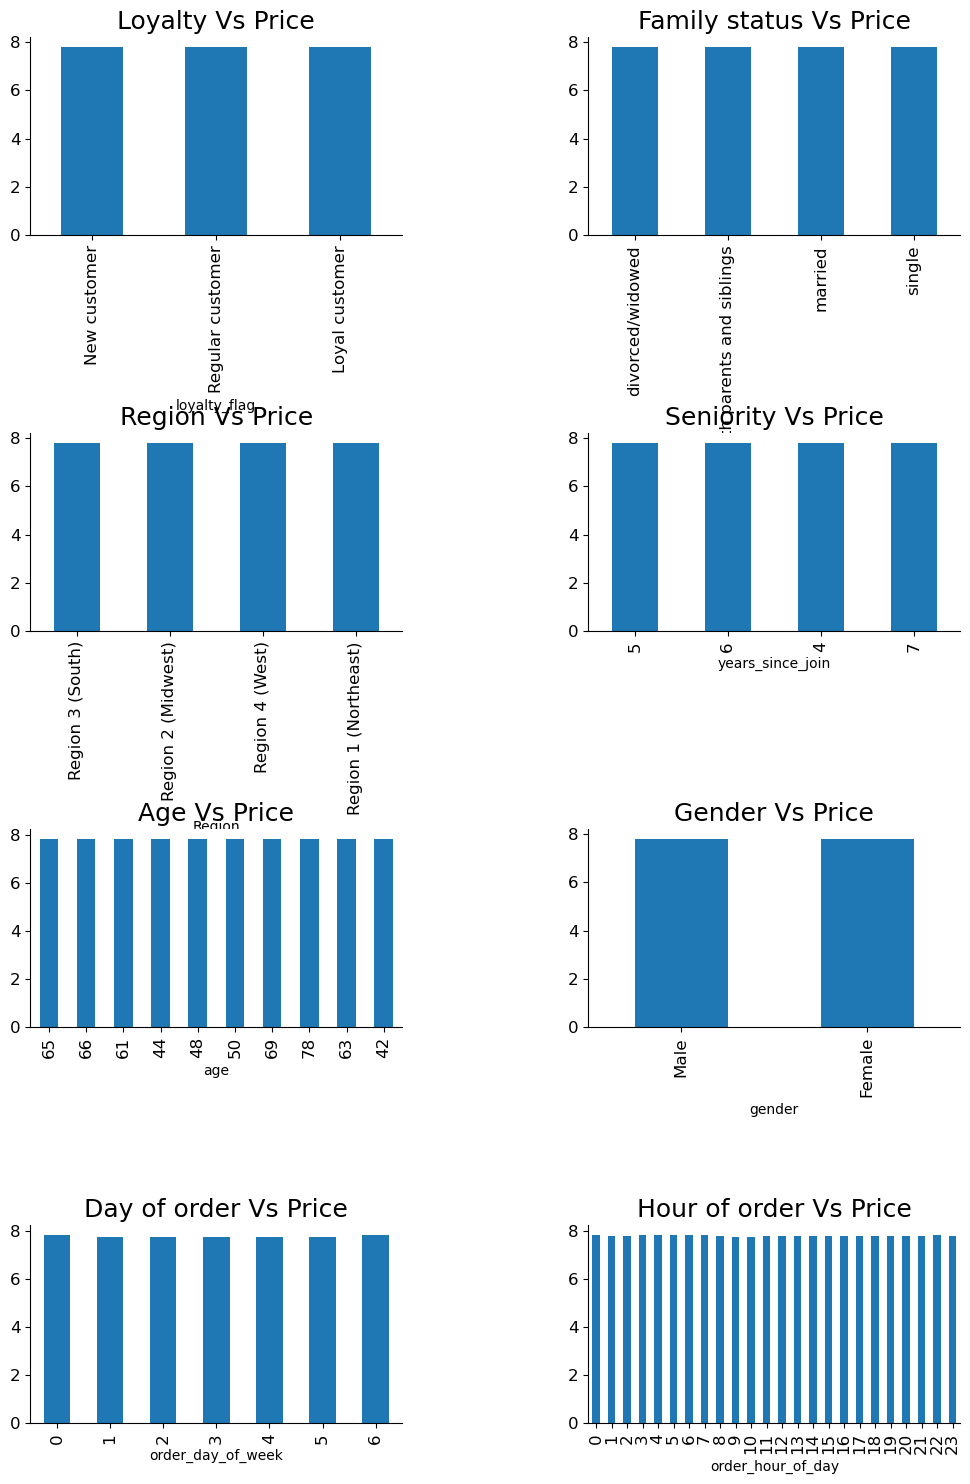

In [99]:
# Visuals comparing multiple varibles to the average prices of products bought

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df.groupby('loyalty_flag')['prices'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Loyalty Vs Price", fontsize=18)
df.groupby('fam_status')['prices'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Family status Vs Price", fontsize=18)
df.groupby('Region')['prices'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Region Vs Price", fontsize=18)
df.groupby('years_since_join')['prices'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Seniority Vs Price", fontsize=18)
df.groupby('age')['prices'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Age Vs Price", fontsize=18)
df.groupby('gender')['prices'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Gender Vs Price", fontsize=18)
df.groupby('order_day_of_week')['prices'].mean().plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Day of order Vs Price", fontsize=18)
df.groupby('order_hour_of_day')['prices'].mean().plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Hour of order Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
axes[0][0].tick_params(labelrotation=45);
axes[0][1].tick_params(labelrotation=45);
axes[1][0].tick_params(labelrotation=45);
sns.despine()


## 6. Deriving variables (customer profiles)
<div id='6'></div>

In [102]:
# Defining the customer profiles to sort :

## 1. single adult :  under 21 y/o and a family status != married
## 2. young parent : under 40 y/o, at least one pendent, and one order in the babies department id (18)
## 3. student : under 25 y/o, family status != married and divorced/widowed, no pendents and an income < 30k
## 4. Retired : above 60 y/o, orders in week days (2,3,4,5,6), orders in working hours (from 9 to 17)
## 5. Family : above 21 y/o, family status = married, at least one pendent and some orders of household goods (department_id = 17)

In [103]:
# 1. single adult :  under 21 y/o and a family status != married

df.loc[(df['age'] < 21) &
        (df['fam_status'] != 'married'), 'cust_profile'] = 'Single adult'

In [112]:
# 2. young parent : under 40 y/o, at least one pendent, and one order in the babies department id (18)
    
df.loc[(df['age'] < 40) &
        (df['n_dependants'] != 0) &
        (df['department_id'] == 18), 'cust_profile'] = 'Young parent'

In [113]:
# 3. student : under 25 y/o, family status != married and divorced/widowed, no pendents and an income < 

df.loc[(df['age'] < 25) &
        (df['fam_status'] != 'married') &
        (df['fam_status'] != 'divorde/widowed') & 
        (df['n_dependants'] == 0) &
        (df['income'] < 30000), 'cust_profile'] = 'Student'

In [114]:
# 4. Retired : above 60 y/o, orders in week days (2,3,4,5,6), orders in working hours (from 9 to 17)

df = df.astype({'order_hour_of_day':'float64'})

df.loc[(df['age'] > 60) &
        (df['order_day_of_week'] != 1 ) &
        (df['order_day_of_week'] != 7) & 
        (df['order_hour_of_day'] >= 9) &
        (df['order_hour_of_day'] <= 17), 'cust_profile'] = 'Retired'

In [115]:
# 5. Family : above 21 y/o, family status = married, at least one pendent and some orders of household goods (department_id = 17)

df.loc[(df['fam_status'] != 'married') & 
        (df['n_dependants'] > 0) &
        (df['department_id'] == 17), 'cust_profile'] = 'Family'

In [116]:
# checking counts of the new cust_profile variable

df['cust_profile'].value_counts(dropna=False)

cust_profile
NaN             23453113
Retired          5945605
Single adult     1408696
Young parent      105132
Family             33349
Student            13792
Name: count, dtype: int64

## 7. Data visualizations
<div id='7'></div>

Text(36.372259837962964, 0.5, 'Price range of each sold item')

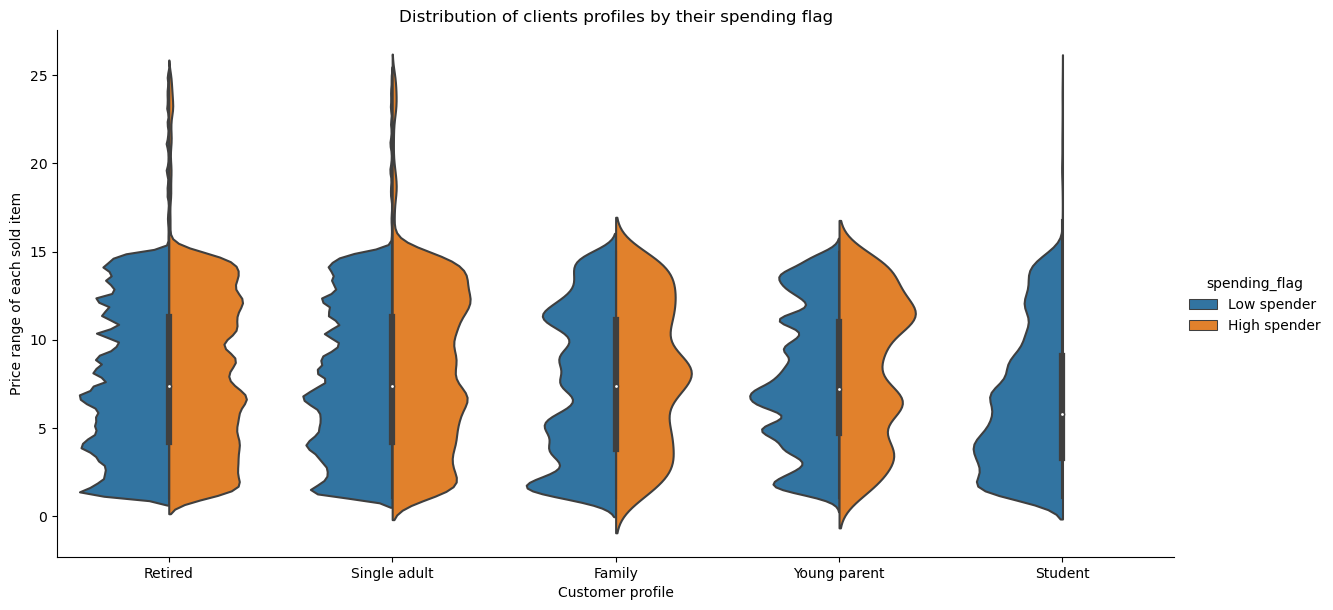

In [133]:
# creating a violin catplot to show the distribution of the profiles, taking into consideration the prices of items ordered and the spending_flag
violin_dist_cust_profiles = sns.catplot(data=df, 
                                        x='cust_profile', 
                                        y='prices', 
                                        hue='spending_flag', 
                                        kind ='violin', 
                                        split = True, 
                                        height=6, aspect=2)
plt.title('Distribution of clients profiles by their spending flag')
plt.xlabel('Customer profile')
plt.ylabel('Price range of each sold item')

Text(1617.3873029513886, 0.5, 'Average number of orders')

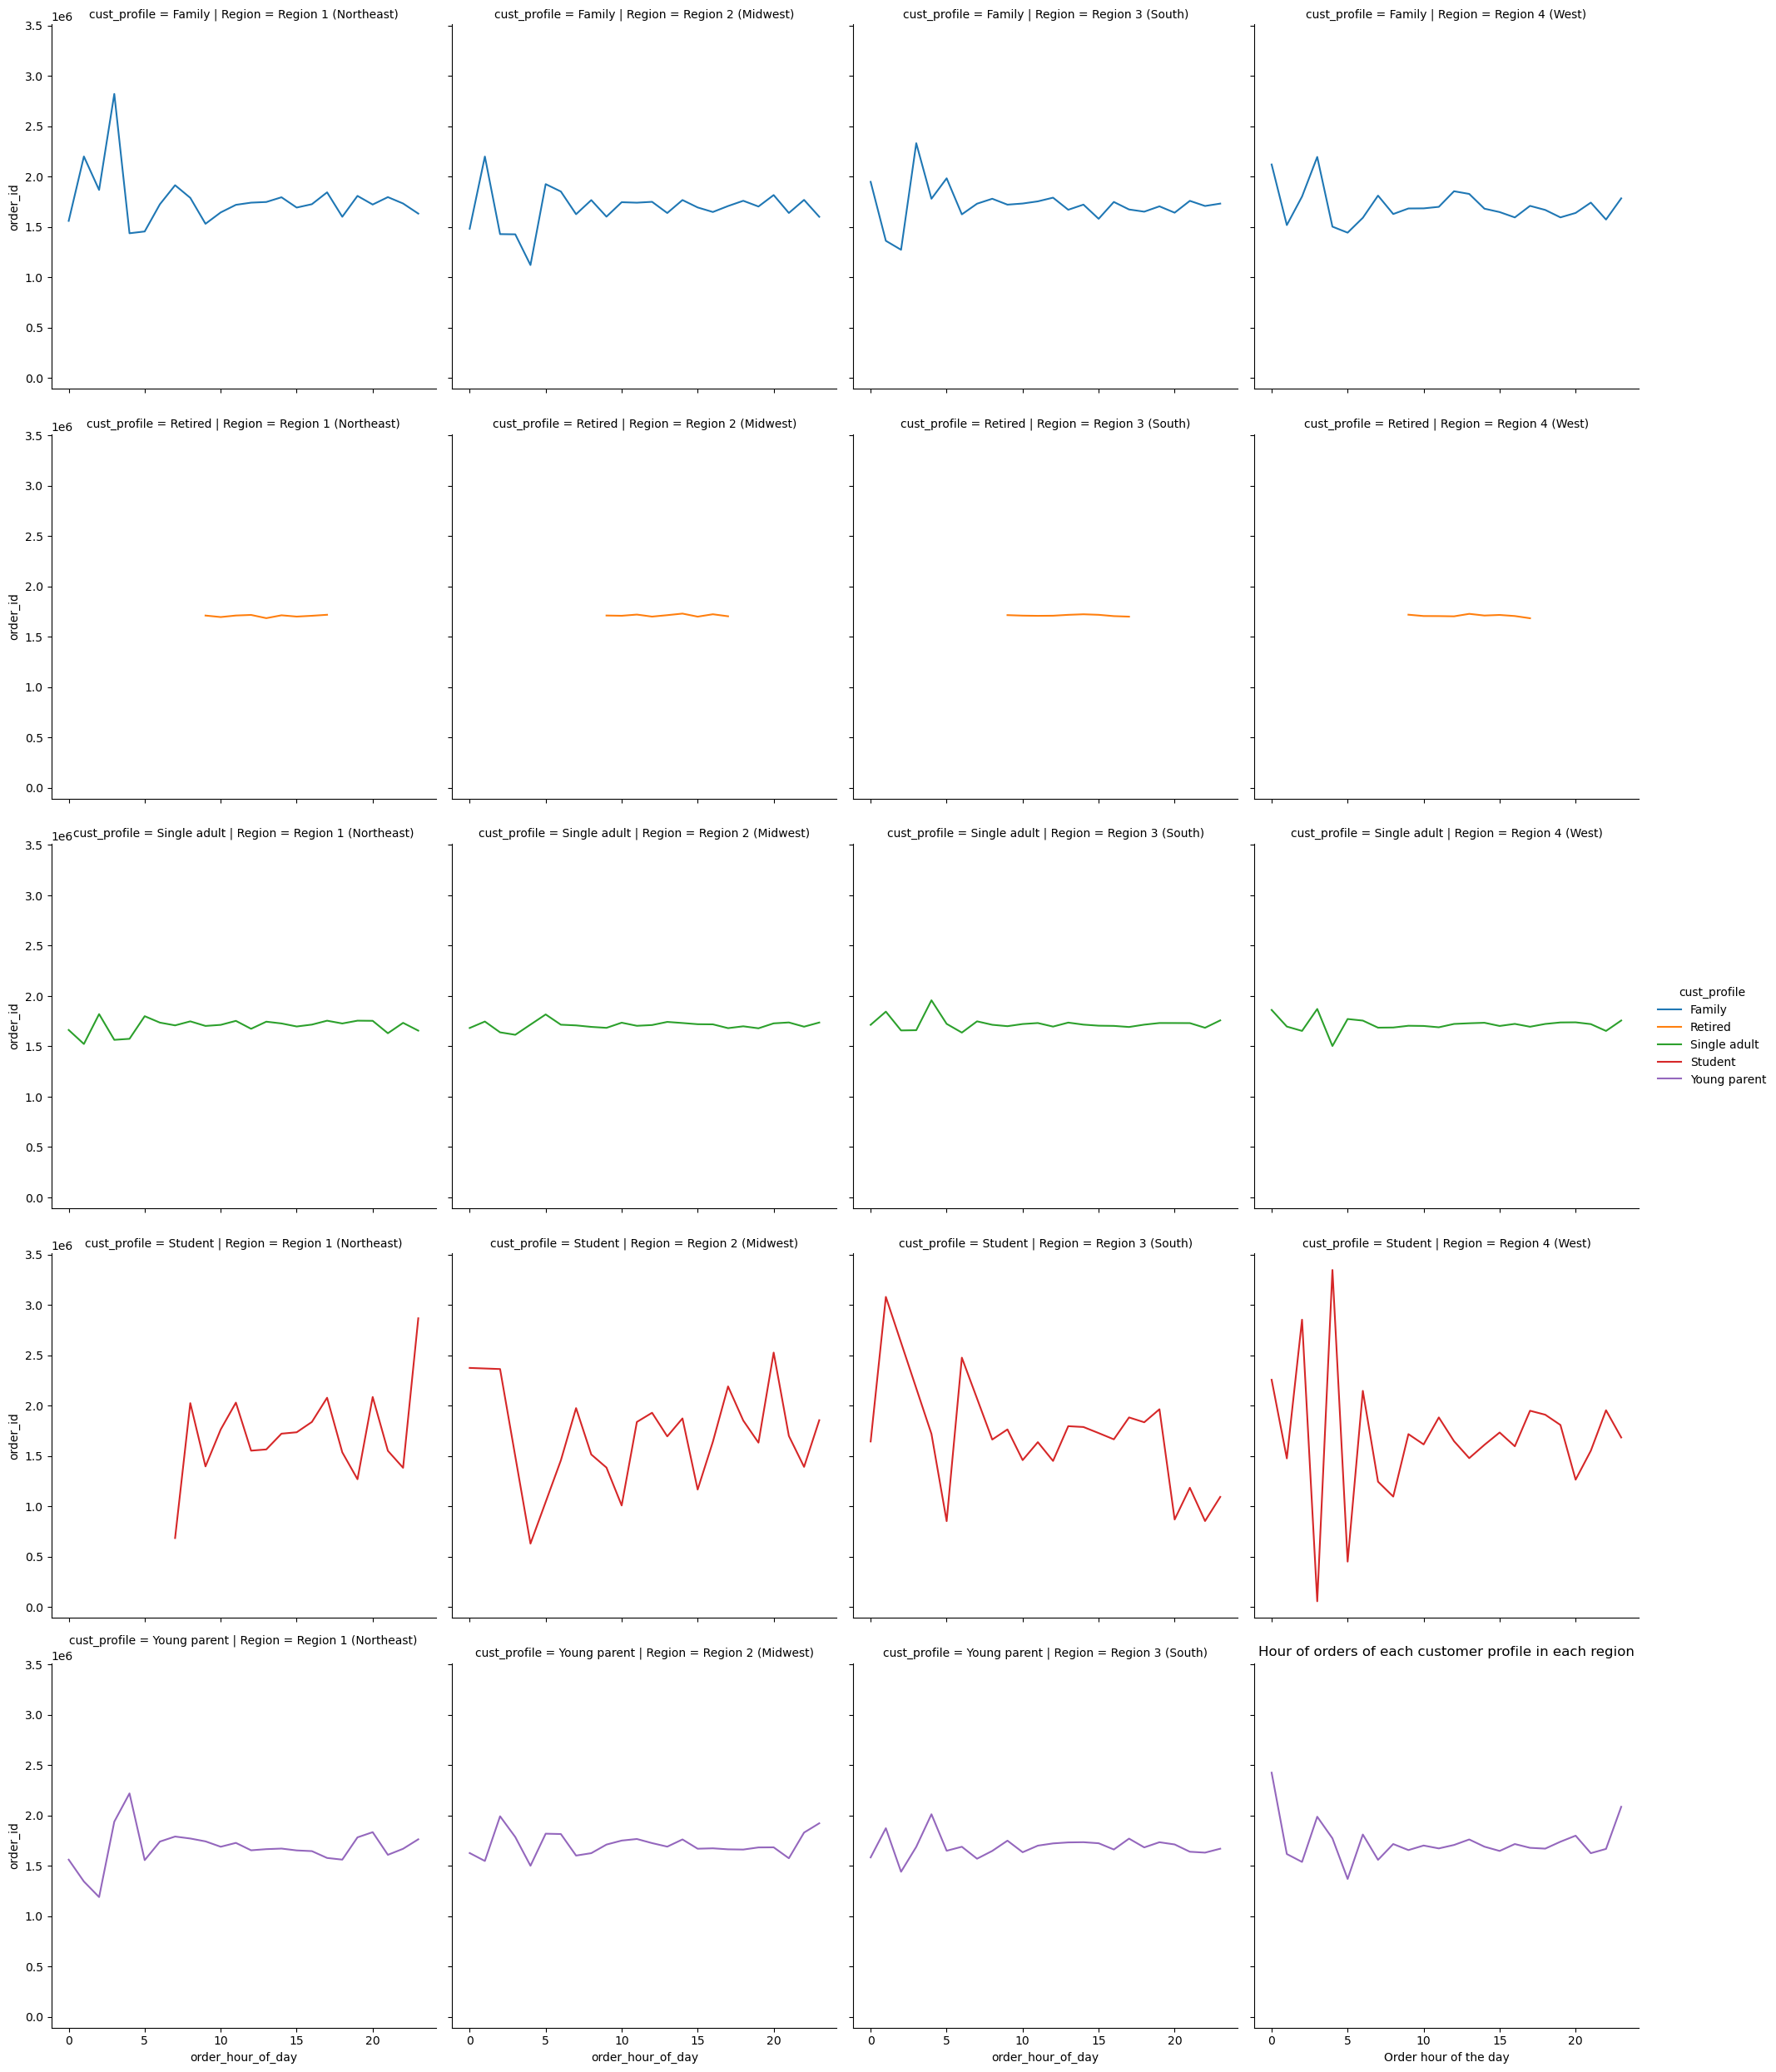

In [118]:
# creating a line plot of all profiles by region and order hour the day habits

pivot_hour_profile = pd.pivot_table(df,index = ['Region','cust_profile', 'order_hour_of_day'], values = 'order_id', aggfunc ='mean').reset_index()

fig_line_hour = sns.relplot(data=pivot_hour_profile, 
                            y='order_id', 
                            x='order_hour_of_day', 
                            hue='cust_profile', 
                            col='Region', 
                            row='cust_profile', 
                            kind='line', 
                            errorbar=None)
plt.title('Hour of orders of each customer profile in each region')
plt.xlabel('Order hour of the day')
plt.ylabel('Average number of orders')

The lineplot above shows different habits of orders hour for the customer profiles :

-For the retired clients, the hour was a selctive criteria, namely there is no order placed outside of working hours.

-Students are clearly the least consistent group of clients, with orders placed at every hour of the dday and even at night, making them somehow more compulsive buyers.

-Families and young adults tend to behave in a similat fashion, quite consistent during the day, with a bit more order in the early mornings

-Young parents look like they are still adjusting their schedules, with more orders placed on early morning and late at night

-People overall tend to order the latest in the West region, that said all regions tend to look similar.

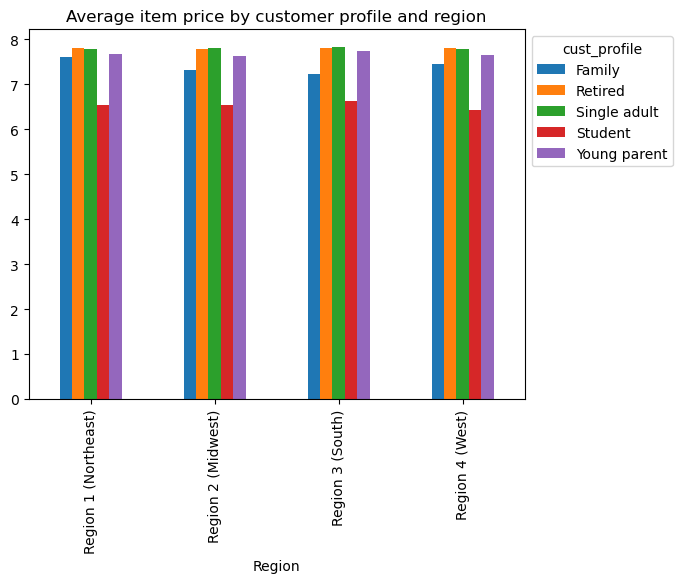

In [120]:
#Creating a barplot showing the average price spent by item, by cusotmer profile accross regions

pivot_region_price_profile = pd.pivot_table(df,index = ['Region'],columns =['cust_profile'], values = 'prices', aggfunc ='mean')
fig_avg_price = pivot_region_price_profile.plot(kind='bar', 
                                                stacked= False, 
                                                title ='Average item price by customer profile and region')
sns.move_legend(fig_avg_price, "upper left", bbox_to_anchor=(1, 1))

The main idea of this barplot is that there are a lot of similarities from a region to another

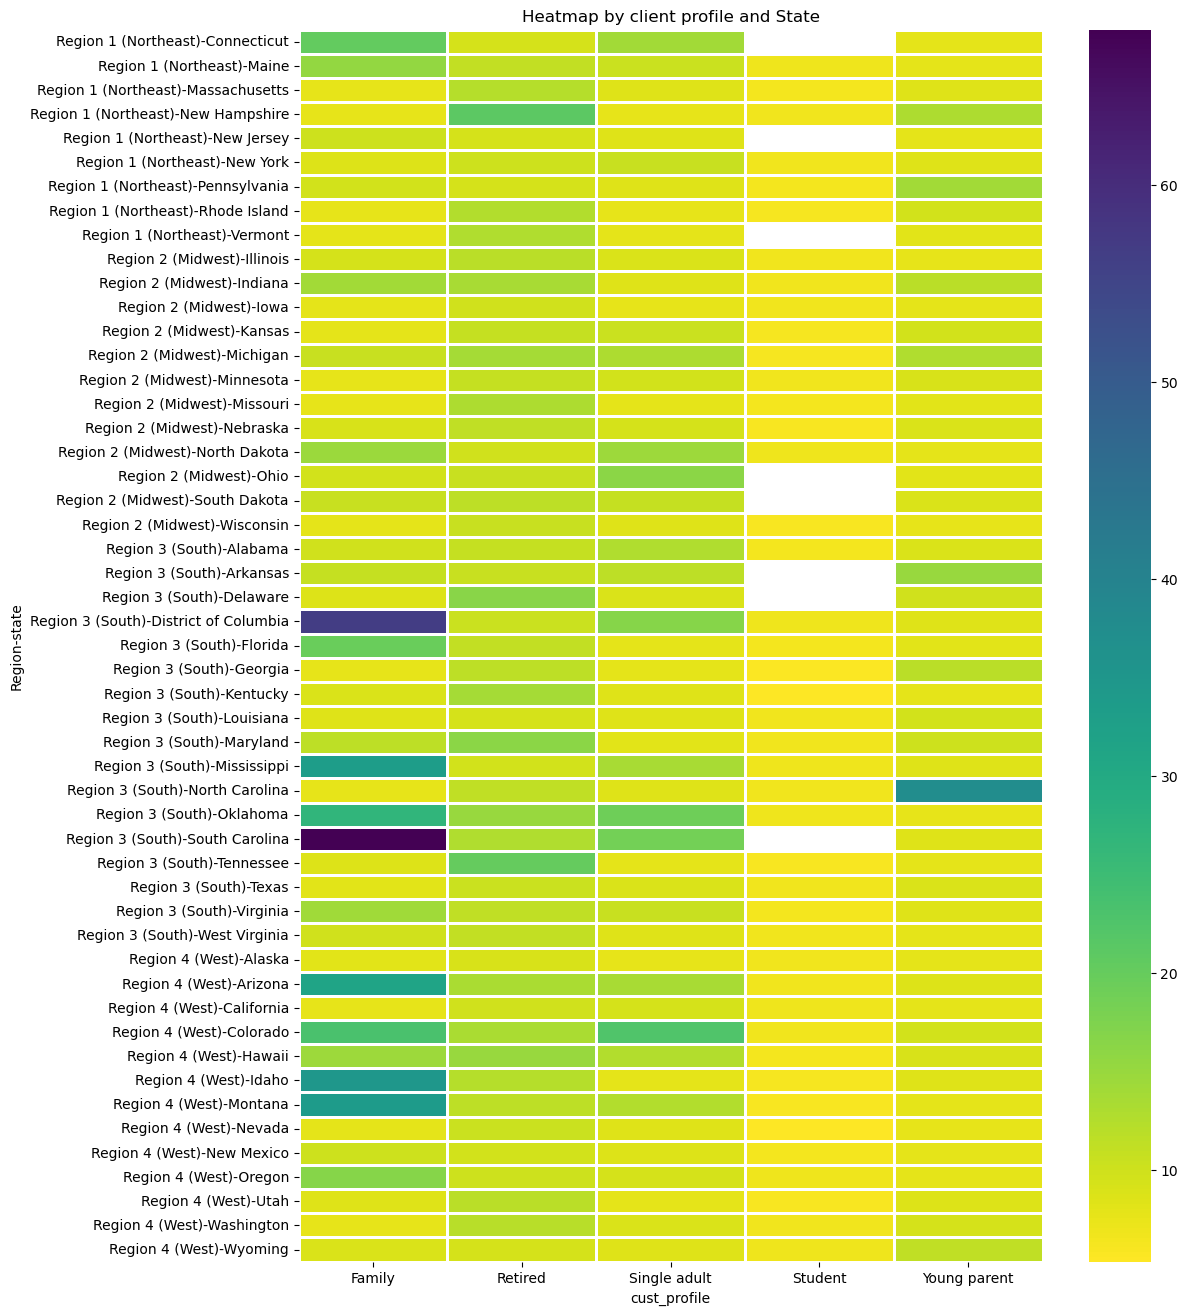

In [122]:
#Creating a heatmap showing the average price by user for each customer profile and for each state of USA

pivot_heatmap = pd.pivot_table(df,
                               index = ['Region','state'],
                               columns =['cust_profile'], 
                               values = 'avg_price_by_user', 
                               aggfunc ='mean')

plt.figure(figsize=(12, 16))
plt.title('Heatmap by client profile and State')
Heatmap_profile = sns.heatmap(pivot_heatmap, 
                              linewidth=.8, 
                              cmap='viridis_r')

In [123]:
# Creating a US map from showing the heatemap on a more visual way

## Importing a csv file containing the iso information needed by plotly
df_iso_states = pd.read_csv(os.path.join(path,'iso_states_usa.csv' ), index_col =False, delimiter =';')

#merging the latest dataframe with the imported ISO codes for the US states

df_iso = pd.merge(df,
                df_iso_states, 
                left_on = 'state', 
                right_on = 'State', 
                how ='left', 
                indicator = False)

#Creating a pivot table grouping the means of each avg_price_by_user for each iso code and custumer profile, base for creating the following choropleth map
full_map_pivot = df_iso.pivot_table(index = ['ISO','state','cust_profile'], 
                                                         values = 'avg_price_by_user', 
                                                         aggfunc ='mean').reset_index()

#Creating a choropleth map from the above pivot table, showing in a animated way the spending habits by state for each customer profile

Fig_profile_map = px.choropleth(full_map_pivot, 
                                color='avg_price_by_user',
                                locations='ISO',
                                locationmode="USA-states", 
                                projection='albers usa', 
                                color_continuous_scale="Viridis_r",
                                animation_frame='cust_profile', 
                                range_color=(5,35), 
                                hover_name ='state', 
                                labels={'avg_price_by_user':'Average price spent', 'cust_profile':'Customer profile' }, 
                                title ='Repartition of the average price spent by customer according to their profile', 
                                width=1500, 
                                height=750)


## 8. Exporting the final dataframe and the main visuals
<div id='8'></div>

In [ ]:
#Saving the final version of the dataframe, enriched with the customer profiles and the ISO of the USA states

df_iso.to_pickle(os.path.join(path, 'ords_prods_high_activity_customers_profile_iso.pkl'))

#saving the main visuals

fig_line_hour.figure.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Lineplot average orders by hours for each customer profile by region.png', dpi=300,bbox_inches='tight')
violin_dist_cust_profiles.figure.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Violin_distribution_profiles.png', dpi=300)
fig_avg_price.figure.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Barplot average price by region and customer profile.png', dpi=300,bbox_inches='tight')
Heatmap_profile.figure.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Heatmap_profile_avg_price.png', dpi=300,bbox_inches='tight')
Fig_profile_map.write_html(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Map_client_profile_avg_price.html')